In [8]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [9]:
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,process=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,process=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,process=True)
    points = l.gen_samples(num_ports) 
    return points


In [10]:
trials = 5
d_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()


run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_process, "natural process"),(linear_process,"linear process"),(mps_process, "mps process")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)  

print(frame)
 


        natural    linear       mps  natural process  linear process  \
index                                                                  
50     0.028579  0.016104  0.017334         0.030474        0.015552   
100    0.050953  0.028130  0.029282         0.041995        0.028074   
200    0.076021  0.058801  0.059849         0.065543        0.060156   
500    0.162258  0.144906  0.149415         0.135118        0.144129   
1400   0.421002  0.395221  0.426625         0.330600        0.395239   
3500   1.074000  0.995865  1.048910         0.795852        0.985010   

       mps process  
index               
50        0.059875  
100       0.064733  
200       0.086247  
500       0.139946  
1400      0.344797  
3500      0.750922  


In [11]:
comparse= [('mps','mps process'),('linear', 'linear process'),('natural', 'natural process')]

def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, comparse, d_list)

print(frame)

        natural    linear       mps  natural process  linear process  \
index                                                                  
50     0.028579  0.016104  0.017334         0.030474        0.015552   
100    0.050953  0.028130  0.029282         0.041995        0.028074   
200    0.076021  0.058801  0.059849         0.065543        0.060156   
500    0.162258  0.144906  0.149415         0.135118        0.144129   
1400   0.421002  0.395221  0.426625         0.330600        0.395239   
3500   1.074000  0.995865  1.048910         0.795852        0.985010   

       mps process  mps speed-up  linear speed-up  natural speed-up  
index                                                                
50        0.059875      0.289499         1.035480          0.937806  
100       0.064733      0.452359         1.001977          1.213317  
200       0.086247      0.693920         0.977475          1.159872  
500       0.139946      1.067655         1.005394          1.200868  
140

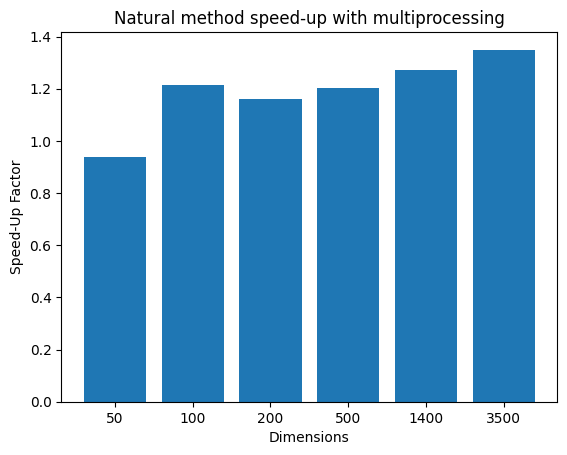

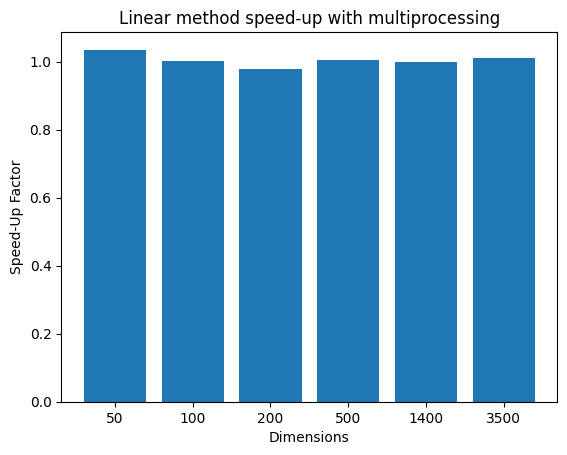

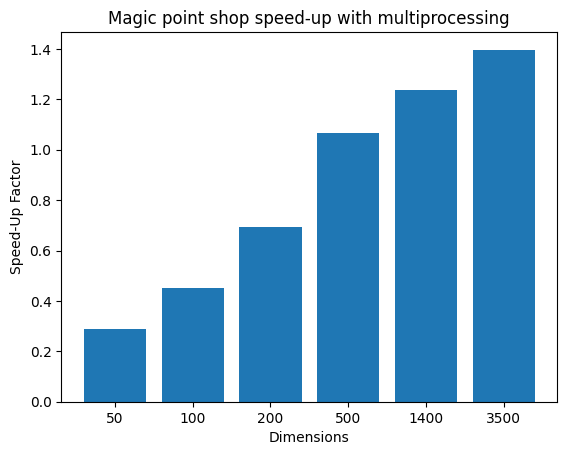

In [12]:
x = lambda array: [str(x) for x in array]

y_axis = frame["natural speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with multiprocessing')
plt.show()

y_axis = frame["linear speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed-up with multiprocessing')
plt.show()

y_axis = frame["mps speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with multiprocessing')
plt.show()


In [15]:
d = 10
p_list = [10, 100, 1000, 10_000, 15_000]
records = {'index':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('index')
names = set()

for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt


        times.append(process_time)
    
    frame2[method_name] = times  
stats.sort_stats('cumulative')


names = list(names)     
speed_up_cal(frame2,comparse, p_list)
print(frame2)

        natural     linear       mps  natural process  linear process  \
index                                                                   
10     0.008300   0.008118  0.008680         0.014238        0.011186   
100    0.041749   0.041521  0.045934         0.046611        0.058761   
1000   0.305036   0.304910  0.339766         0.272213        0.310850   
10000  4.008196   4.952173  4.346511         3.069476        5.435988   
15000  4.830526   4.924070  5.092830         3.855549        5.034995   
20000  8.457884  10.105604  8.759711         6.377805        9.680660   

       mps process  mps speed-up  linear speed-up  natural speed-up  
index                                                                
10        0.010433      0.831944         0.725690          0.582959  
100       0.039666      1.158036         0.706614          0.895694  
1000      0.278382      1.220501         0.980891          1.120579  
10000     4.164690      1.043658         0.910998          1.3058

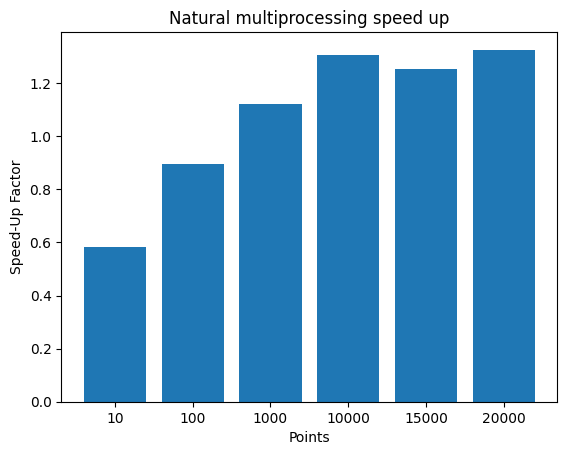

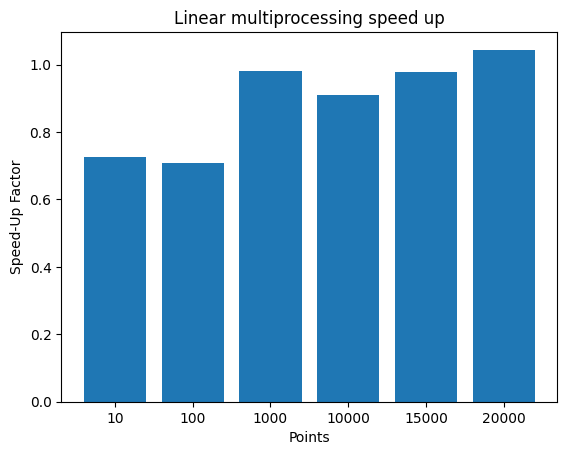

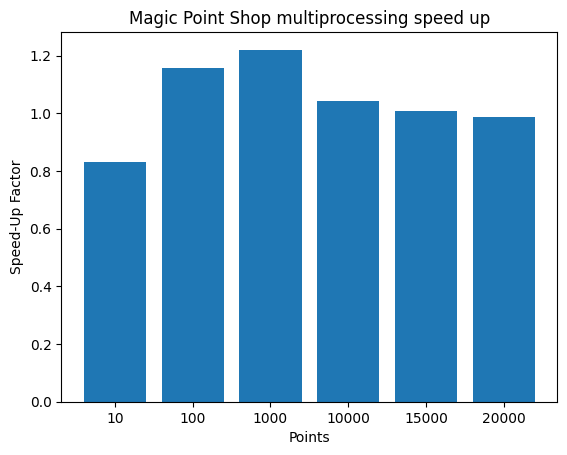

In [16]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["natural speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural multiprocessing speed up')
plt.show()

y_axis = frame2["linear speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear multiprocessing speed up')
plt.show()

y_axis = frame2["mps speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic Point Shop multiprocessing speed up')
plt.show()